# EDA & DATA PREPROCESSING

In [1]:
# libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import cifar10

import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Shape of features

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))

Shape of X_train: (50000, 32, 32, 3)
Shape of X_test: (10000, 32, 32, 3)


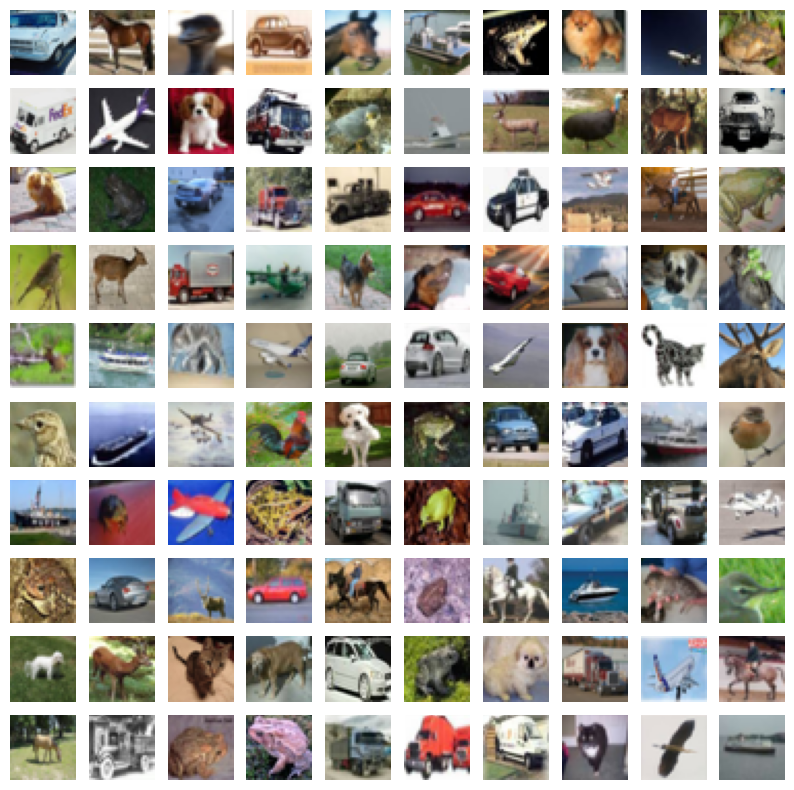

In [4]:
# some of examples

import random

random_indices = random.sample(range(50000), 100)  

plt.figure(figsize=(10, 10))

for i, idx in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train[idx])
    plt.axis("off")

plt.show()

In [5]:
# convert to one-hot-encoding

numberOfClass = 10

y_train = to_categorical(y_train, numberOfClass)
y_test = to_categorical(y_test, numberOfClass)

print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of y_train: (50000, 10)
Shape of y_test: (10000, 10)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.80, random_state=42)

In [7]:
# Shape of trains, validations and test data

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))

print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_val: {}".format(y_val.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (40000, 32, 32, 3)
Shape of X_val: (10000, 32, 32, 3)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_train: (40000, 10)
Shape of y_val: (10000, 10)
Shape of y_test: (10000, 10)


# DATA AUGMENTATION

In [8]:
train_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg19.preprocess_input,
                                  rotation_range = 10,
                                  zoom_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  shear_range = 0.1,
                                  horizontal_flip = True,
                                  vertical_flip = False)

val_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg19.preprocess_input)


train_datagen.fit(X_train)
val_datagen.fit(X_val)

In [9]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                           patience = 3,
                                           verbose = 1,
                                           factor = 0.5,
                                           min_lr = 0.00001)

# VGG19 MODEL

In [10]:
vgg = VGG19(include_top = False, weights = "imagenet", input_shape = X_train.shape[1:])

vgg.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# building our model from vgg19

model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 1, 1, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,864,266 (83.41 MB)

 Trainable params: 21,864,266 (83.41 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# loss & optimizer

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)

model.compile(loss = "categorical_crossentropy",
             optimizer = optimizer,
             metrics = ["accuracy"])

# TRAIN THE MODEL

In [13]:
hist = model.fit(train_datagen.flow(X_train, y_train, batch_size = 256),
                validation_data = val_datagen.flow(X_val, y_val, batch_size = 256),
                epochs = 25,
                verbose = 1,
                callbacks = [learning_rate_reduction])

Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - accuracy: 0.2801 - loss: 2.1169 - val_accuracy: 0.6232 - val_loss: 1.0797 - learning_rate: 0.0010
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - accuracy: 0.6495 - loss: 0.9983 - val_accuracy: 0.7420 - val_loss: 0.7447 - learning_rate: 0.0010
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - accuracy: 0.7281 - loss: 0.7862 - val_accuracy: 0.7578 - val_loss: 0.7247 - learning_rate: 0.0010
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - accuracy: 0.7577 - loss: 0.6929 - val_accuracy: 0.7771 - val_loss: 0.6679 - learning_rate: 0.0010
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 145ms/step - accuracy: 0.7873 - loss: 0.6099 - val_accuracy: 0.8057 - val_loss: 0.5743 - learning_rate: 0.0010
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 148ms/step - accuracy: 0.8018 - loss: 0.5767 - val_accuracy: 0.8068 - val_loss: 0.5887 - learning_rate: 0.0010
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - accuracy: 0.8

# EVALUTION

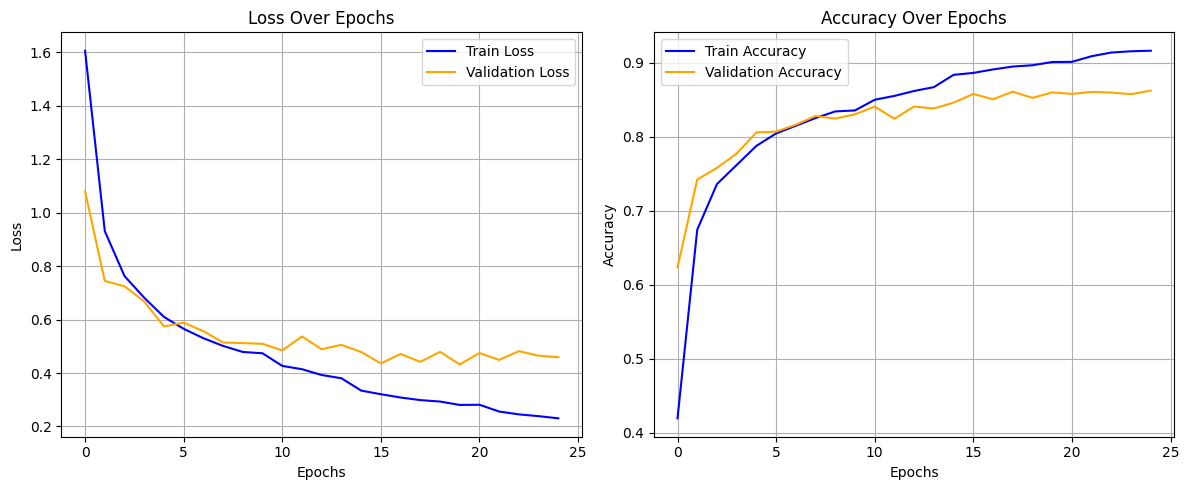

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loss Graph
ax1.plot(hist.history["loss"], label="Train Loss", color='blue')
ax1.plot(hist.history["val_loss"], label="Validation Loss", color='orange')
ax1.set_title("Loss Over Epochs")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.grid(True)

# Accuracy Graph
ax2.plot(hist.history["accuracy"], label="Train Accuracy", color='blue')
ax2.plot(hist.history["val_accuracy"], label="Validation Accuracy", color='orange')
ax2.set_title("Accuracy Over Epochs")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

X_test = tf.keras.applications.vgg19.preprocess_input(X_test)

y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)

print("Testing Accuracy:", accuracy_score(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Testing Accuracy: 0.8618


Text(0.5, 1.0, 'Confusion Matrix')

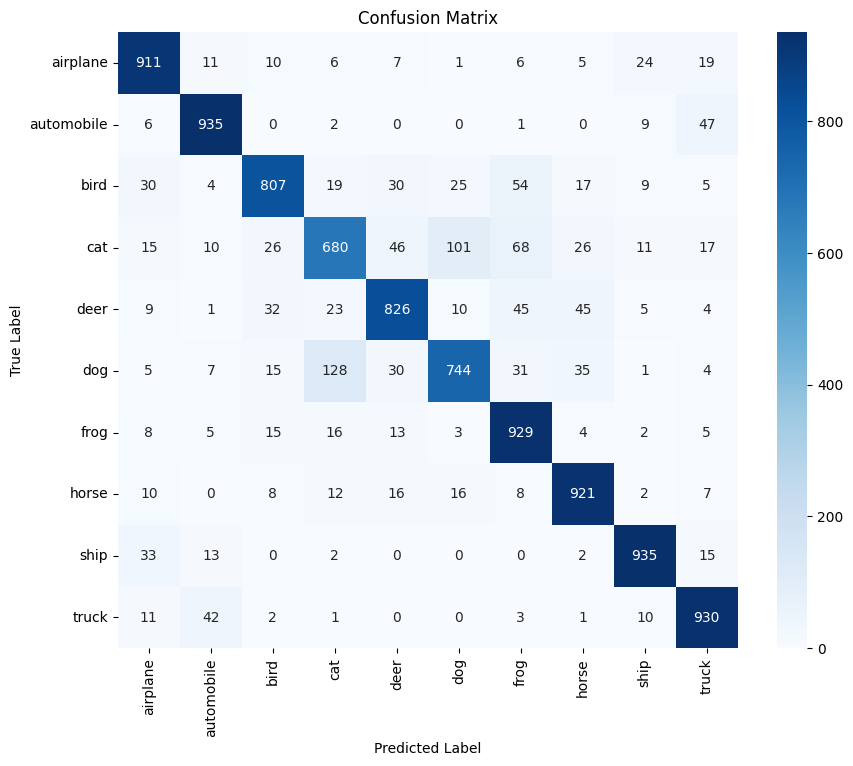

In [16]:
# confussion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")